In [2]:
import requests
from bs4 import BeautifulSoup
import re
import pandas as pd
import numpy as np

In [195]:
page = requests.get("https://www.cars24.com/new-cars/citroen/")
page

<Response [200]>

In [196]:
page.text

'<!DOCTYPE html><html lang="en"><head><meta charSet="utf-8"/><meta name="viewport" content="initial-scale=1.0, width=device-width"/><meta name="ROBOTS" content="INDEX,FOLLOW"/><title>Citroen Cars: Explore All Models of Citroen in India</title><meta name="description" content="Explore all models of Citroen cars in India. Discover a wide range of Citroen vehicles with their price, features and specifications."/><meta property="og:title" content="Citroen Cars: Explore All Models of Citroen in India"/><meta property="og:description" content="Explore all models of Citroen cars in India. Discover a wide range of Citroen vehicles with their price, features and specifications."/><meta property="og:image" content="/new-cars/images/logo-black.svg"/><meta property="og:url"/><meta name="twitter:title" content="Citroen Cars: Explore All Models of Citroen in India"/><meta name="twitter:description" content="Explore all models of Citroen cars in India. Discover a wide range of Citroen vehicles with t

In [197]:
soup = BeautifulSoup(page.text)
soup

<!DOCTYPE html>
<html lang="en"><head><meta charset="utf-8"/><meta content="initial-scale=1.0, width=device-width" name="viewport"/><meta content="INDEX,FOLLOW" name="ROBOTS"/><title>Citroen Cars: Explore All Models of Citroen in India</title><meta content="Explore all models of Citroen cars in India. Discover a wide range of Citroen vehicles with their price, features and specifications." name="description"/><meta content="Citroen Cars: Explore All Models of Citroen in India" property="og:title"/><meta content="Explore all models of Citroen cars in India. Discover a wide range of Citroen vehicles with their price, features and specifications." property="og:description"/><meta content="/new-cars/images/logo-black.svg" property="og:image"/><meta property="og:url"/><meta content="Citroen Cars: Explore All Models of Citroen in India" name="twitter:title"/><meta content="Explore all models of Citroen cars in India. Discover a wide range of Citroen vehicles with their price, features and sp

In [198]:
m = soup.find_all("h3",class_="font-medium text-xl")
m

[<h3 class="font-medium text-xl"> <!-- -->C3</h3>,
 <h3 class="font-medium text-xl"> <!-- -->eC3</h3>,
 <h3 class="font-medium text-xl"> <!-- -->C5 Aircross</h3>,
 <h3 class="font-medium text-xl"> <!-- -->C3 Facelift</h3>,
 <h3 class="font-medium text-xl"> <!-- -->Basalt</h3>]

In [199]:
Models = []
for i in m:
    Models.append(i.text)
Models

[' C3', ' eC3', ' C5 Aircross', ' C3 Facelift', ' Basalt']

In [223]:
mileage = []
Fuel_Type = []
Transmission = []
cc = []
price = []
seating = []
body_type = []
no_of_cylinders = []

for i in  Models:
    a = i.lower()
    b = re.findall("\w+[a-zA-Z\s\-\d+]+",a)
    c = str(b[0]).replace(" ","-")
    print("https://www.cars24.com/new-cars/citroen/"+c+"/specifications/")
    url = "https://www.cars24.com/new-cars/citroen/"+c+"/specifications/"
    page = requests.get(url)

    page.text

    soup = BeautifulSoup(page.text)

    m = soup.find_all("div",class_="flex items-center")

    for i in m:
        a = i.text
        b = re.findall("\d+[\.]\d+",a)
        if len(b)>0:
            mileage.append(b[0])
    mileage[0]

    f = soup.find_all("div",class_="flex gap-2 justify-between text-xs p-4")

    for i in f:
        a = i.text
        b = re.findall("Fuel Type(\w+)",a)
        if len(b) > 0:
            Fuel_Type.append(b[0])
    Fuel_Type[0]

    t = soup.find_all("div",class_="flex gap-2 justify-between text-xs p-4")

    for i in t:
        a = i.text
        b = re.findall("Transmission Type(\w+)",a)
        if len(b) > 0:
            Transmission.append(b[0])
    Transmission[0]

    E = soup.find_all("div",class_="flex gap-2 justify-between text-xs p-4")

    for i in E:
        a = i.text
        b = re.findall("Engine Displacement \Wcc\W(\d+)",a)
        if len(b) > 0:
            cc.append(b[0])
    cc[0]


    p = soup.find_all("p",class_="text-base")

    for i in p:
        price.append(i.text.split("*")[0])
    price

    sc = soup.find_all("div",class_="flex gap-2 justify-between text-xs p-4")

    for i in sc:
        a = i.text
        b = re.findall("Seating Capacity(\d+)",a)
        if len(b) > 0:
            seating.append(b[0])
    seating[0]

    b = soup.find_all("div",class_="flex gap-2 justify-between text-xs p-4")

    for i in b:
        a = i.text
        b = re.findall("Body Type(\w+)",a)
        if len(b) > 0:
            body_type.append(b[0])
    body_type[0]

    c = soup.find_all("div",class_="flex gap-2 justify-between text-xs p-4")

    for i in c:
        a = i.text
        b = re.findall("No. of cylinder(\d+)",a)
        if len(b) > 0:
            no_of_cylinders.append(b[0])
    no_of_cylinders[0]

https://www.cars24.com/new-cars/citroen/c3/specifications/
https://www.cars24.com/new-cars/citroen/ec3/specifications/
https://www.cars24.com/new-cars/citroen/c5-aircross/specifications/
https://www.cars24.com/new-cars/citroen/c3-facelift/specifications/
https://www.cars24.com/new-cars/citroen/basalt/specifications/


In [230]:
len(no_of_cylinders),len(seating),len(body_type),len(price),len(cc),len(Transmission),len(mileage),len(Fuel_Type)

(5, 5, 5, 5, 5, 5, 5, 5)

In [203]:
Fuel_Type

['Petrol', 'Electric', 'Diesel', 'Petrol', 'Petrol']

In [225]:
#cc.insert(1,0)
#cc.insert(3,0)

In [227]:
#mileage.insert(1,0)
#mileage.insert(2,0)
#mileage.insert(3,0)
#mileage.insert(4,0)

In [229]:
#no_of_cylinders.insert(0,0)
#no_of_cylinders.insert(1,0)
#no_of_cylinders.insert(2,0)
#no_of_cylinders.insert(3,0)
#no_of_cylinders.insert(4,0)
#no_of_cylinders.insert(6,0)

In [231]:
Brand = []
#for i in range(5):
    Brand.append("Citroen")
Brand

['Citroen', 'Citroen', 'Citroen', 'Citroen', 'Citroen']

In [232]:
#df = {"Brands":Brand,
    "Models":Models,
      "Mileage":mileage,
     "Body_Type":body_type,
     "Seating":seating,
     "Prices":price,
     "Engine_CC":cc,
     "Transmission":Transmission,
     "Fuel_Type":Fuel_Type,
     "No_Of_Cylinders":no_of_cylinders}

In [233]:
#df1 = pd.DataFrame(df)

In [234]:
df1

,Brands,Models,Mileage,Body_Type,Seating,Prices,Engine_CC,Transmission,Fuel_Type,No_Of_Cylinders
0,Citroen,C3,19.3,Hatchback,5,₹ 6.2 Lakh,1198,Manual,Petrol,3
1,Citroen,eC3,0,SUV,5,₹ 11.5 Lakh,0,Automatic,Electric,0
2,Citroen,C5 Aircross,10.3,SUV,5,₹ 36.9 Lakh,1997,Automatic,Diesel,4
3,Citroen,C3 Facelift,0,Hatchback,5,₹ 6.2 Lakh,1198,Manual,Petrol,0
4,Citroen,Basalt,17.5,Coupe,5,₹ 12.0 Lakh,1998,Manual,Petrol,0


In [235]:
#df1.to_csv("Citroen.csv")

In [4]:
df = pd.read_csv(r"C:\Users\anees\jupeter programs\Final_3.csv")

In [5]:
df

,Unnamed: 0,Id,Brands,Models,Mileage,Body_Type,Seating,Prices,Engine_CC,Transmission,Fuel_Type,No_Of_Cylinders,price_in_crores
0,0,0,Citroen,C3,19.3,Hatchback,5,6.2 Lakh,1198,Manual,Petrol,3,620000.0
1,1,1,Citroen,eC3,0.0,SUV,5,11.5 Lakh,0,Automatic,Electric,0,1150000.0
2,2,2,Citroen,C5 Aircross,10.3,SUV,5,36.9 Lakh,1997,Automatic,Diesel,4,3690000.0
3,3,3,Citroen,C3 Facelift,0.0,Hatchback,5,6.2 Lakh,1198,Manual,Petrol,0,620000.0
4,4,4,Citroen,Basalt,17.5,Coupe,5,12.0 Lakh,1998,Manual,Petrol,0,1200000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,294,294,Volvo,XC40 Recharge,0.0,SUV,5,56.9 Lakh,0,Automatic,Electric,0,5690000.0
295,295,295,Volvo,XC60,11.2,SUV,5,67.5 Lakh,1969,Automatic,Petrol,0,6750000.0
296,296,296,Volvo,S90,14.7,Sedan,5,67.9 Lakh,1969,Automatic,Petrol,4,6790000.0
297,297,297,Volvo,XC90,17.2,SUV,7,98.5 Lakh,1969,Automatic,Petrol,4,9850000.0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       299 non-null    int64  
 1   Id               299 non-null    int64  
 2   Brands           299 non-null    object 
 3   Models           299 non-null    object 
 4   Mileage          299 non-null    float64
 5   Body_Type        299 non-null    object 
 6   Seating          299 non-null    int64  
 7   Prices           299 non-null    object 
 8   Engine_CC        299 non-null    int64  
 9   Transmission     299 non-null    object 
 10  Fuel_Type        299 non-null    object 
 11  No_Of_Cylinders  299 non-null    int64  
 12  price_in_crores  299 non-null    float64
dtypes: float64(2), int64(5), object(6)
memory usage: 30.5+ KB


In [7]:
df.drop("Unnamed: 0",axis = 1,inplace=True)

In [8]:
df["price_in_crores"]

0        620000.0
1       1150000.0
2       3690000.0
3        620000.0
4       1200000.0
          ...    
294     5690000.0
295     6750000.0
296     6790000.0
297     9850000.0
298    15000000.0
Name: price_in_crores, Length: 299, dtype: float64

In [24]:
#df2 = df1.drop("Unnamed: 0.1",axis = 1)

In [9]:
df

,Id,Brands,Models,Mileage,Body_Type,Seating,Prices,Engine_CC,Transmission,Fuel_Type,No_Of_Cylinders,price_in_crores
0,0,Citroen,C3,19.3,Hatchback,5,6.2 Lakh,1198,Manual,Petrol,3,620000.0
1,1,Citroen,eC3,0.0,SUV,5,11.5 Lakh,0,Automatic,Electric,0,1150000.0
2,2,Citroen,C5 Aircross,10.3,SUV,5,36.9 Lakh,1997,Automatic,Diesel,4,3690000.0
3,3,Citroen,C3 Facelift,0.0,Hatchback,5,6.2 Lakh,1198,Manual,Petrol,0,620000.0
4,4,Citroen,Basalt,17.5,Coupe,5,12.0 Lakh,1998,Manual,Petrol,0,1200000.0
...,...,...,...,...,...,...,...,...,...,...,...,...
294,294,Volvo,XC40 Recharge,0.0,SUV,5,56.9 Lakh,0,Automatic,Electric,0,5690000.0
295,295,Volvo,XC60,11.2,SUV,5,67.5 Lakh,1969,Automatic,Petrol,0,6750000.0
296,296,Volvo,S90,14.7,Sedan,5,67.9 Lakh,1969,Automatic,Petrol,4,6790000.0
297,297,Volvo,XC90,17.2,SUV,7,98.5 Lakh,1969,Automatic,Petrol,4,9850000.0


In [27]:
a = []
for i in list(range(299)):
    a.append(i)

In [28]:
a

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 146,
 147,
 148,
 149,
 150,
 151,
 152,
 153,
 154,
 155,
 156,
 157,
 158,
 159,
 160,
 161,
 162,
 163,
 164,
 165,
 166,
 167,
 168,
 169,
 170,
 171,
 172,
 173,
 174,
 175,
 176,
 177,
 178,
 179,
 180,
 181,
 182,
 183,
 184,


In [29]:
len(a)

299

In [30]:
df2["Id"]=a

In [31]:
df2

,Brands,Models,Mileage,Body_Type,Seating,Prices,Engine_CC,Transmission,Fuel_Type,No_Of_Cylinders,Id
0,Citroen,C3,19.3,Hatchback,5,₹ 6.2 Lakh,1198,Manual,Petrol,3.0,0
1,Citroen,eC3,0.0,SUV,5,₹ 11.5 Lakh,0,Automatic,Electric,0.0,1
2,Citroen,C5 Aircross,10.3,SUV,5,₹ 36.9 Lakh,1997,Automatic,Diesel,4.0,2
3,Citroen,C3 Facelift,0.0,Hatchback,5,₹ 6.2 Lakh,1198,Manual,Petrol,0.0,3
4,Citroen,Basalt,17.5,Coupe,5,₹ 12.0 Lakh,1998,Manual,Petrol,0.0,4
...,...,...,...,...,...,...,...,...,...,...,...
294,Volvo,XC40 Recharge,0.0,SUV,5,₹ 56.9 Lakh,0,Automatic,Electric,0.0,294
295,Volvo,XC60,11.2,SUV,5,₹ 67.5 Lakh,1969,Automatic,Petrol,0.0,295
296,Volvo,S90,14.7,Sedan,5,₹ 67.9 Lakh,1969,Automatic,Petrol,4.0,296
297,Volvo,XC90,17.2,SUV,7,₹ 98.5 Lakh,1969,Automatic,Petrol,4.0,297


In [32]:
df2.columns

Index(['Brands', 'Models', 'Mileage', 'Body_Type', 'Seating', 'Prices',
       'Engine_CC', 'Transmission', 'Fuel_Type', 'No_Of_Cylinders', 'Id'],
      dtype='object')

In [36]:
df2.set_index('Id')

,Brands,Models,Mileage,Body_Type,Seating,Prices,Engine_CC,Transmission,Fuel_Type,No_Of_Cylinders
Id,,,,,,,,,,
0,Citroen,C3,19.3,Hatchback,5,₹ 6.2 Lakh,1198,Manual,Petrol,3.0
1,Citroen,eC3,0.0,SUV,5,₹ 11.5 Lakh,0,Automatic,Electric,0.0
2,Citroen,C5 Aircross,10.3,SUV,5,₹ 36.9 Lakh,1997,Automatic,Diesel,4.0
3,Citroen,C3 Facelift,0.0,Hatchback,5,₹ 6.2 Lakh,1198,Manual,Petrol,0.0
4,Citroen,Basalt,17.5,Coupe,5,₹ 12.0 Lakh,1998,Manual,Petrol,0.0
...,...,...,...,...,...,...,...,...,...,...
294,Volvo,XC40 Recharge,0.0,SUV,5,₹ 56.9 Lakh,0,Automatic,Electric,0.0
295,Volvo,XC60,11.2,SUV,5,₹ 67.5 Lakh,1969,Automatic,Petrol,0.0
296,Volvo,S90,14.7,Sedan,5,₹ 67.9 Lakh,1969,Automatic,Petrol,4.0


In [41]:
df2.reset_index(inplace = True)

In [42]:
df2

,index,Brands,Models,Mileage,Body_Type,Seating,Prices,Engine_CC,Transmission,Fuel_Type,No_Of_Cylinders,Id
0,0,Citroen,C3,19.3,Hatchback,5,₹ 6.2 Lakh,1198,Manual,Petrol,3.0,0
1,1,Citroen,eC3,0.0,SUV,5,₹ 11.5 Lakh,0,Automatic,Electric,0.0,1
2,2,Citroen,C5 Aircross,10.3,SUV,5,₹ 36.9 Lakh,1997,Automatic,Diesel,4.0,2
3,3,Citroen,C3 Facelift,0.0,Hatchback,5,₹ 6.2 Lakh,1198,Manual,Petrol,0.0,3
4,4,Citroen,Basalt,17.5,Coupe,5,₹ 12.0 Lakh,1998,Manual,Petrol,0.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...
294,294,Volvo,XC40 Recharge,0.0,SUV,5,₹ 56.9 Lakh,0,Automatic,Electric,0.0,294
295,295,Volvo,XC60,11.2,SUV,5,₹ 67.5 Lakh,1969,Automatic,Petrol,0.0,295
296,296,Volvo,S90,14.7,Sedan,5,₹ 67.9 Lakh,1969,Automatic,Petrol,4.0,296
297,297,Volvo,XC90,17.2,SUV,7,₹ 98.5 Lakh,1969,Automatic,Petrol,4.0,297


In [46]:
df1 = df2.drop("Id",axis=1)

In [47]:
df1

,index,Brands,Models,Mileage,Body_Type,Seating,Prices,Engine_CC,Transmission,Fuel_Type,No_Of_Cylinders
0,0,Citroen,C3,19.3,Hatchback,5,₹ 6.2 Lakh,1198,Manual,Petrol,3.0
1,1,Citroen,eC3,0.0,SUV,5,₹ 11.5 Lakh,0,Automatic,Electric,0.0
2,2,Citroen,C5 Aircross,10.3,SUV,5,₹ 36.9 Lakh,1997,Automatic,Diesel,4.0
3,3,Citroen,C3 Facelift,0.0,Hatchback,5,₹ 6.2 Lakh,1198,Manual,Petrol,0.0
4,4,Citroen,Basalt,17.5,Coupe,5,₹ 12.0 Lakh,1998,Manual,Petrol,0.0
...,...,...,...,...,...,...,...,...,...,...,...
294,294,Volvo,XC40 Recharge,0.0,SUV,5,₹ 56.9 Lakh,0,Automatic,Electric,0.0
295,295,Volvo,XC60,11.2,SUV,5,₹ 67.5 Lakh,1969,Automatic,Petrol,0.0
296,296,Volvo,S90,14.7,Sedan,5,₹ 67.9 Lakh,1969,Automatic,Petrol,4.0
297,297,Volvo,XC90,17.2,SUV,7,₹ 98.5 Lakh,1969,Automatic,Petrol,4.0


In [48]:
df1.rename(columns = {"index":"Id"},inplace = True)

In [49]:
df1

,Id,Brands,Models,Mileage,Body_Type,Seating,Prices,Engine_CC,Transmission,Fuel_Type,No_Of_Cylinders
0,0,Citroen,C3,19.3,Hatchback,5,₹ 6.2 Lakh,1198,Manual,Petrol,3.0
1,1,Citroen,eC3,0.0,SUV,5,₹ 11.5 Lakh,0,Automatic,Electric,0.0
2,2,Citroen,C5 Aircross,10.3,SUV,5,₹ 36.9 Lakh,1997,Automatic,Diesel,4.0
3,3,Citroen,C3 Facelift,0.0,Hatchback,5,₹ 6.2 Lakh,1198,Manual,Petrol,0.0
4,4,Citroen,Basalt,17.5,Coupe,5,₹ 12.0 Lakh,1998,Manual,Petrol,0.0
...,...,...,...,...,...,...,...,...,...,...,...
294,294,Volvo,XC40 Recharge,0.0,SUV,5,₹ 56.9 Lakh,0,Automatic,Electric,0.0
295,295,Volvo,XC60,11.2,SUV,5,₹ 67.5 Lakh,1969,Automatic,Petrol,0.0
296,296,Volvo,S90,14.7,Sedan,5,₹ 67.9 Lakh,1969,Automatic,Petrol,4.0
297,297,Volvo,XC90,17.2,SUV,7,₹ 98.5 Lakh,1969,Automatic,Petrol,4.0


In [50]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Id               299 non-null    int64  
 1   Brands           299 non-null    object 
 2   Models           299 non-null    object 
 3   Mileage          299 non-null    float64
 4   Body_Type        299 non-null    object 
 5   Seating          299 non-null    int64  
 6   Prices           299 non-null    object 
 7   Engine_CC        299 non-null    int64  
 8   Transmission     299 non-null    object 
 9   Fuel_Type        299 non-null    object 
 10  No_Of_Cylinders  299 non-null    float64
dtypes: float64(2), int64(3), object(6)
memory usage: 25.8+ KB


In [55]:
df1["Prices"] = df1["Prices"].str.replace("₹","")

In [56]:
df1["Prices"]

0         6.2 Lakh
1        11.5 Lakh
2        36.9 Lakh
3         6.2 Lakh
4        12.0 Lakh
          ...     
294      56.9 Lakh
295      67.5 Lakh
296      67.9 Lakh
297      98.5 Lakh
298     1.50 Crore
Name: Prices, Length: 299, dtype: object

In [57]:
df1

,Id,Brands,Models,Mileage,Body_Type,Seating,Prices,Engine_CC,Transmission,Fuel_Type,No_Of_Cylinders
0,0,Citroen,C3,19.3,Hatchback,5,6.2 Lakh,1198,Manual,Petrol,3.0
1,1,Citroen,eC3,0.0,SUV,5,11.5 Lakh,0,Automatic,Electric,0.0
2,2,Citroen,C5 Aircross,10.3,SUV,5,36.9 Lakh,1997,Automatic,Diesel,4.0
3,3,Citroen,C3 Facelift,0.0,Hatchback,5,6.2 Lakh,1198,Manual,Petrol,0.0
4,4,Citroen,Basalt,17.5,Coupe,5,12.0 Lakh,1998,Manual,Petrol,0.0
...,...,...,...,...,...,...,...,...,...,...,...
294,294,Volvo,XC40 Recharge,0.0,SUV,5,56.9 Lakh,0,Automatic,Electric,0.0
295,295,Volvo,XC60,11.2,SUV,5,67.5 Lakh,1969,Automatic,Petrol,0.0
296,296,Volvo,S90,14.7,Sedan,5,67.9 Lakh,1969,Automatic,Petrol,4.0
297,297,Volvo,XC90,17.2,SUV,7,98.5 Lakh,1969,Automatic,Petrol,4.0


In [58]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Id               299 non-null    int64  
 1   Brands           299 non-null    object 
 2   Models           299 non-null    object 
 3   Mileage          299 non-null    float64
 4   Body_Type        299 non-null    object 
 5   Seating          299 non-null    int64  
 6   Prices           299 non-null    object 
 7   Engine_CC        299 non-null    int64  
 8   Transmission     299 non-null    object 
 9   Fuel_Type        299 non-null    object 
 10  No_Of_Cylinders  299 non-null    float64
dtypes: float64(2), int64(3), object(6)
memory usage: 25.8+ KB


In [59]:
df1["Mileage"]

0      19.3
1       0.0
2      10.3
3       0.0
4      17.5
       ... 
294     0.0
295    11.2
296    14.7
297    17.2
298     0.0
Name: Mileage, Length: 299, dtype: float64

In [60]:
df1.isnull().sum()

Id                 0
Brands             0
Models             0
Mileage            0
Body_Type          0
Seating            0
Prices             0
Engine_CC          0
Transmission       0
Fuel_Type          0
No_Of_Cylinders    0
dtype: int64

In [61]:
df1["Prices"]

0         6.2 Lakh
1        11.5 Lakh
2        36.9 Lakh
3         6.2 Lakh
4        12.0 Lakh
          ...     
294      56.9 Lakh
295      67.5 Lakh
296      67.9 Lakh
297      98.5 Lakh
298     1.50 Crore
Name: Prices, Length: 299, dtype: object

In [79]:
a = df2["Prices"].str.split()

values = a.str[0].astype(float)  
units = a.str[1]

conversion_factor = units.map({"Crore": 10000000, "Lakh": 100000})
numerical_values_in_crore = (values * conversion_factor)

df2["price_in_crores"] = numerical_values_in_crore

In [73]:
df1

,Id,Brands,Models,Mileage,Body_Type,Seating,Prices,Engine_CC,Transmission,Fuel_Type,No_Of_Cylinders,price_in_crores
0,0,Citroen,C3,19.3,Hatchback,5,6.2 Lakh,1198,Manual,Petrol,3.0,NaN
1,1,Citroen,eC3,0.0,SUV,5,11.5 Lakh,0,Automatic,Electric,0.0,NaN
2,2,Citroen,C5 Aircross,10.3,SUV,5,36.9 Lakh,1997,Automatic,Diesel,4.0,NaN
3,3,Citroen,C3 Facelift,0.0,Hatchback,5,6.2 Lakh,1198,Manual,Petrol,0.0,NaN
4,4,Citroen,Basalt,17.5,Coupe,5,12.0 Lakh,1998,Manual,Petrol,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
294,294,Volvo,XC40 Recharge,0.0,SUV,5,56.9 Lakh,0,Automatic,Electric,0.0,NaN
295,295,Volvo,XC60,11.2,SUV,5,67.5 Lakh,1969,Automatic,Petrol,0.0,NaN
296,296,Volvo,S90,14.7,Sedan,5,67.9 Lakh,1969,Automatic,Petrol,4.0,NaN
297,297,Volvo,XC90,17.2,SUV,7,98.5 Lakh,1969,Automatic,Petrol,4.0,NaN


In [77]:
df2 = df1.drop("price_in_crores",axis=1)

In [78]:
df2

,Id,Brands,Models,Mileage,Body_Type,Seating,Prices,Engine_CC,Transmission,Fuel_Type,No_Of_Cylinders
0,0,Citroen,C3,19.3,Hatchback,5,6.2 Lakh,1198,Manual,Petrol,3.0
1,1,Citroen,eC3,0.0,SUV,5,11.5 Lakh,0,Automatic,Electric,0.0
2,2,Citroen,C5 Aircross,10.3,SUV,5,36.9 Lakh,1997,Automatic,Diesel,4.0
3,3,Citroen,C3 Facelift,0.0,Hatchback,5,6.2 Lakh,1198,Manual,Petrol,0.0
4,4,Citroen,Basalt,17.5,Coupe,5,12.0 Lakh,1998,Manual,Petrol,0.0
...,...,...,...,...,...,...,...,...,...,...,...
294,294,Volvo,XC40 Recharge,0.0,SUV,5,56.9 Lakh,0,Automatic,Electric,0.0
295,295,Volvo,XC60,11.2,SUV,5,67.5 Lakh,1969,Automatic,Petrol,0.0
296,296,Volvo,S90,14.7,Sedan,5,67.9 Lakh,1969,Automatic,Petrol,4.0
297,297,Volvo,XC90,17.2,SUV,7,98.5 Lakh,1969,Automatic,Petrol,4.0


In [80]:
df2

,Id,Brands,Models,Mileage,Body_Type,Seating,Prices,Engine_CC,Transmission,Fuel_Type,No_Of_Cylinders,price_in_crores
0,0,Citroen,C3,19.3,Hatchback,5,6.2 Lakh,1198,Manual,Petrol,3.0,620000.0
1,1,Citroen,eC3,0.0,SUV,5,11.5 Lakh,0,Automatic,Electric,0.0,1150000.0
2,2,Citroen,C5 Aircross,10.3,SUV,5,36.9 Lakh,1997,Automatic,Diesel,4.0,3690000.0
3,3,Citroen,C3 Facelift,0.0,Hatchback,5,6.2 Lakh,1198,Manual,Petrol,0.0,620000.0
4,4,Citroen,Basalt,17.5,Coupe,5,12.0 Lakh,1998,Manual,Petrol,0.0,1200000.0
...,...,...,...,...,...,...,...,...,...,...,...,...
294,294,Volvo,XC40 Recharge,0.0,SUV,5,56.9 Lakh,0,Automatic,Electric,0.0,5690000.0
295,295,Volvo,XC60,11.2,SUV,5,67.5 Lakh,1969,Automatic,Petrol,0.0,6750000.0
296,296,Volvo,S90,14.7,Sedan,5,67.9 Lakh,1969,Automatic,Petrol,4.0,6790000.0
297,297,Volvo,XC90,17.2,SUV,7,98.5 Lakh,1969,Automatic,Petrol,4.0,9850000.0


In [81]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Id               299 non-null    int64  
 1   Brands           299 non-null    object 
 2   Models           299 non-null    object 
 3   Mileage          299 non-null    float64
 4   Body_Type        299 non-null    object 
 5   Seating          299 non-null    int64  
 6   Prices           299 non-null    object 
 7   Engine_CC        299 non-null    int64  
 8   Transmission     299 non-null    object 
 9   Fuel_Type        299 non-null    object 
 10  No_Of_Cylinders  299 non-null    float64
 11  price_in_crores  299 non-null    float64
dtypes: float64(3), int64(3), object(6)
memory usage: 28.2+ KB


In [83]:
df2["No_Of_Cylinders"] = df2["No_Of_Cylinders"].astype("int")

In [84]:
df2

,Id,Brands,Models,Mileage,Body_Type,Seating,Prices,Engine_CC,Transmission,Fuel_Type,No_Of_Cylinders,price_in_crores
0,0,Citroen,C3,19.3,Hatchback,5,6.2 Lakh,1198,Manual,Petrol,3,620000.0
1,1,Citroen,eC3,0.0,SUV,5,11.5 Lakh,0,Automatic,Electric,0,1150000.0
2,2,Citroen,C5 Aircross,10.3,SUV,5,36.9 Lakh,1997,Automatic,Diesel,4,3690000.0
3,3,Citroen,C3 Facelift,0.0,Hatchback,5,6.2 Lakh,1198,Manual,Petrol,0,620000.0
4,4,Citroen,Basalt,17.5,Coupe,5,12.0 Lakh,1998,Manual,Petrol,0,1200000.0
...,...,...,...,...,...,...,...,...,...,...,...,...
294,294,Volvo,XC40 Recharge,0.0,SUV,5,56.9 Lakh,0,Automatic,Electric,0,5690000.0
295,295,Volvo,XC60,11.2,SUV,5,67.5 Lakh,1969,Automatic,Petrol,0,6750000.0
296,296,Volvo,S90,14.7,Sedan,5,67.9 Lakh,1969,Automatic,Petrol,4,6790000.0
297,297,Volvo,XC90,17.2,SUV,7,98.5 Lakh,1969,Automatic,Petrol,4,9850000.0


In [85]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Id               299 non-null    int64  
 1   Brands           299 non-null    object 
 2   Models           299 non-null    object 
 3   Mileage          299 non-null    float64
 4   Body_Type        299 non-null    object 
 5   Seating          299 non-null    int64  
 6   Prices           299 non-null    object 
 7   Engine_CC        299 non-null    int64  
 8   Transmission     299 non-null    object 
 9   Fuel_Type        299 non-null    object 
 10  No_Of_Cylinders  299 non-null    int32  
 11  price_in_crores  299 non-null    float64
dtypes: float64(2), int32(1), int64(3), object(6)
memory usage: 27.0+ KB


In [88]:
#df2.to_csv("Final_df1.csv")

In [87]:
df2.columns

Index(['Id', 'Brands', 'Models', 'Mileage', 'Body_Type', 'Seating', 'Prices',
       'Engine_CC', 'Transmission', 'Fuel_Type', 'No_Of_Cylinders',
       'price_in_crores'],
      dtype='object')

In [91]:
df2["Brands"].unique()

array(['Citroen', 'Rolls-Royce', 'Bentley', 'Maruti Suzuki', 'BMW', 'BYD',
       'Aston Martin', 'Ferrari', 'Force', 'MG', 'Honda', 'Jaguar',
       'Isuzu', 'Lexus', 'Jeep', 'Skoda', 'volkswagen', 'Land Rover',
       'Hyundai', 'Mahindra', 'Mercedes-Benz', 'Maserati', 'Mclaren',
       'Ford', 'Porsche', 'Nissan', 'Mini', 'Vinfast', 'Audi', 'Kia',
       'Tata', 'Toyota', 'Renault', 'Lamborghini', 'Volvo'], dtype=object)

In [92]:
df2["Brands"].value_counts()

Brands
Mercedes-Benz    27
Maruti Suzuki    26
Tata             22
Mahindra         21
Hyundai          21
BMW              18
Toyota           14
Audi             13
Kia              11
MG                9
Porsche           8
Skoda             8
Land Rover        7
Lexus             7
Jeep              7
Rolls-Royce       6
Volvo             6
Mini              5
Nissan            5
Renault           5
Ferrari           5
Isuzu             5
Citroen           5
Honda             5
Maserati          4
Aston Martin      4
BYD               4
Jaguar            4
volkswagen        4
Ford              3
Force             3
Bentley           3
Lamborghini       2
Mclaren           1
Vinfast           1
Name: count, dtype: int64

<Axes: xlabel='Brands'>

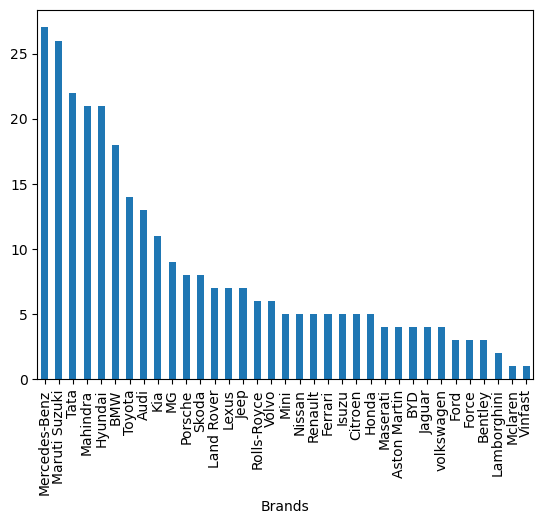

In [93]:
df2["Brands"].value_counts().plot.bar()

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

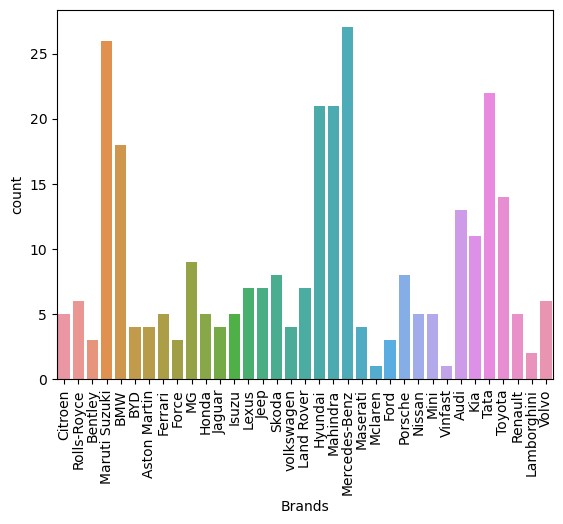

In [13]:
sns.countplot(x = df["Brands"])
plt.xticks(rotation = 90)
plt.show()

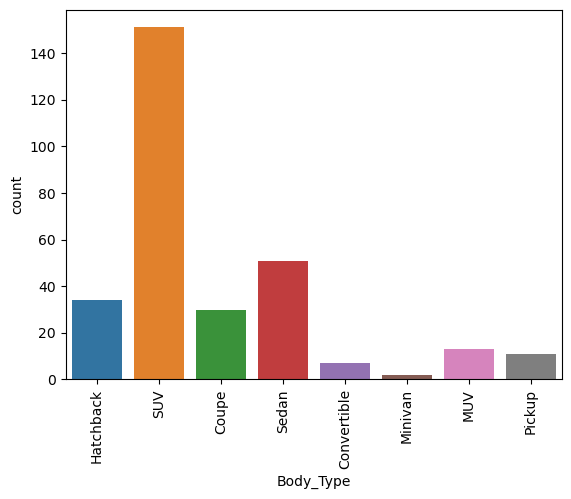

In [14]:
sns.countplot(x = df["Body_Type"])
plt.xticks(rotation = 90)
plt.show()